In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import load
import pickle

In [2]:
df = pd.read_csv("Test Datasets/Syn.csv").drop(columns=['Unnamed: 0',' Timestamp','SimillarHTTP','Flow ID',' Source IP',' Destination IP'])
df.columns = df.columns.str.strip()

C:\Users\anura\AppData\Local\Temp\ipykernel_18360\4232660375.py:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Test Datasets/Syn.csv").drop(columns=['Unnamed: 0',' Timestamp','SimillarHTTP','Flow ID',' Source IP',' Destination IP'])


In [3]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()

In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder();
df['Label'] = label_encoder.fit_transform(df['Label'])

In [5]:
model = load('Models/Syn_model.joblib')

In [6]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [7]:
from sklearn.preprocessing import MaxAbsScaler

with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

X = scaler.transform(X)

In [8]:
y_pred = model.predict(X)

In [9]:
from sklearn.metrics import classification_report,roc_curve, auc,RocCurveDisplay

print(classification_report(y,y_pred))


              precision    recall  f1-score   support

           0       0.96      0.88      0.92     35387
           1       1.00      1.00      1.00   4002078

    accuracy                           1.00   4037465
   macro avg       0.98      0.94      0.96   4037465
weighted avg       1.00      1.00      1.00   4037465



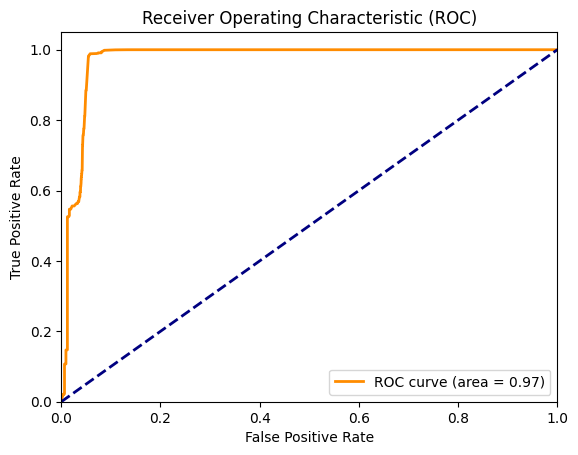

In [10]:
# Predict probabilities for the positive class (class 1)
y_proba = model.predict_proba(X)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y, y_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

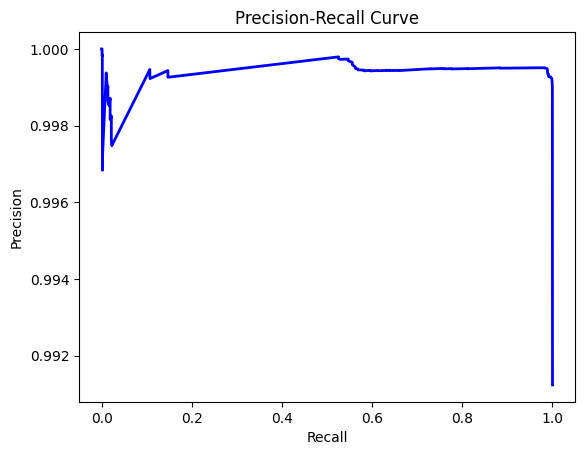

In [11]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y, y_proba)

# Plot the Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()